# Lead Scoring Case Study

### Step1: Importing libraries and data

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the data
lead_df = pd.read_csv('Leads.csv')

In [4]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.shape

(9240, 37)

### Step 2: Data Understanding and Interpretation

In [6]:
# check statistics for numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# check whether there are any duplicates
lead_df.duplicated().sum()

0

In [8]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Observation
1. A large number of columns have null values.
2. Prospect ID and Lead Number both serve the same purpose. They are both unique identifiers. 
3. Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when    someone does not select anything from the dropdown

## Step 3: Data Cleaning

### 3.1 Treatment for 'Select' values
As stated in the problem description, several categorical variables contain a level labeled 'Select,' which requires special handling since it effectively represents a missing or null value. This likely occurs when a customer didn't choose any option from the list, resulting in the default 'Select' value for those columns.

In [9]:
#Replacing select with NaN
lead_df = lead_df.replace('Select', np.nan)

### 3.2 Handling Missing Values

In [10]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [11]:
#dropping columns with more than 40% missing/null values
lead_df.drop(columns=lead_df.columns[round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2) >= 40], inplace=True)

In [12]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [13]:
lead_df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

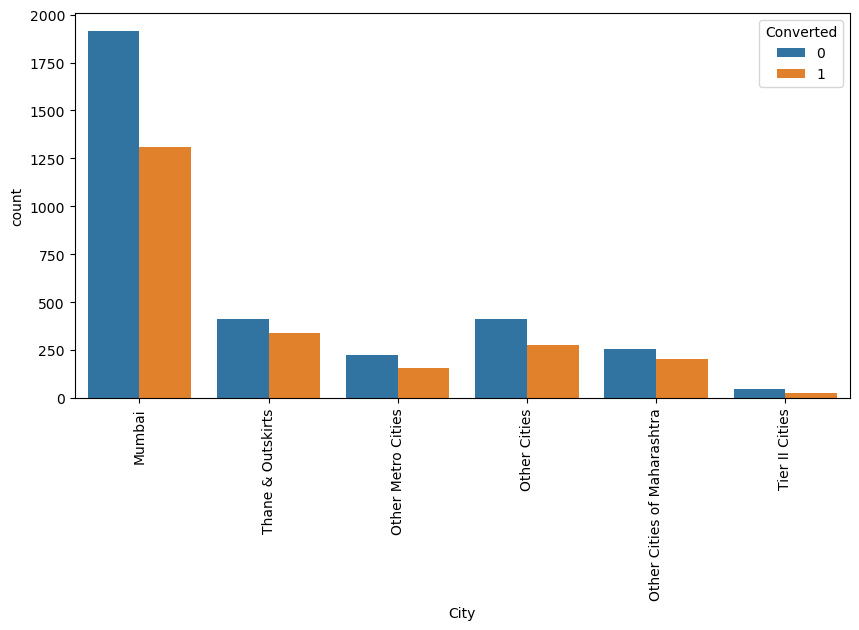

In [14]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(x='City', hue='Converted', data=lead_df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

In [15]:
lead_df.drop(['City'],axis=1,inplace=True)

In [16]:
lead_df.Specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called Not Specified.

In [17]:
lead_df['Specialization'] = lead_df.Specialization.replace(np.nan, 'Not Specified')

In [18]:
lead_df.Specialization.value_counts(dropna = False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
# categorize all management courses
lead_df.loc[(lead_df.Specialization == 'Finance Management') | 
            (lead_df.Specialization == 'Human Resource Management') | 
            (lead_df.Specialization == 'Marketing Management') |  
            (lead_df.Specialization == 'Operations Management') |
            (lead_df.Specialization == 'IT Projects Management') | 
            (lead_df.Specialization == 'Supply Chain Management') |
            (lead_df.Specialization == 'Healthcare Management') | 
            (lead_df.Specialization == 'Hospitality Management') |
            (lead_df.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
lead_df.loc[(lead_df.Specialization == 'Business Administration') | 
            (lead_df.Specialization == 'International Business') | 
            (lead_df.Specialization == 'Rural and Agribusiness') | 
            (lead_df.Specialization == 'E-Business') , 'Specialization'] = 'Business Specializations'

# categorize all industry courses
lead_df.loc[(lead_df.Specialization == 'Banking, Investment And Insurance') | 
            (lead_df.Specialization == 'Media and Advertising') |
            (lead_df.Specialization == 'Travel and Tourism') | 
            (lead_df.Specialization == 'Services Excellence') |
            (lead_df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [20]:
lead_df.Specialization.value_counts(dropna = False)

Management Specializations    4253
Not Specified                 3380
Industry Specializations       896
Business Specializations       711
Name: Specialization, dtype: int64

In [21]:
lead_df.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

In [22]:
lead_df.drop(['Tags'],axis=1,inplace=True)

In [23]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight. Hence dropping it.

In [24]:
lead_df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [25]:
lead_df['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

The missing values in this column could be imputed with 'Unemployed' as it has the most values. From a business perspective, this variable holds significance, given that X Education specializes in online courses, and individuals without current employment may be inclined to enroll in such courses to enhance their employability prospects.

In [26]:
# combine low representing categories
lead_df.loc[(lead_df['What is your current occupation'] == 'Student') | 
            (lead_df['What is your current occupation'] == 'Other') | 
            (lead_df['What is your current occupation'] == 'Housewife') | 
            (lead_df['What is your current occupation'] == 'Businessman') , "What is your current occupation"] = 'Student and Others'


In [27]:
#replace NaN with Unemployed
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [28]:
lead_df['What is your current occupation'].value_counts(dropna= False)

Unemployed              8290
Working Professional     706
Student and Others       244
Name: What is your current occupation, dtype: int64

In [29]:
lead_df['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

 X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

In [30]:
lead_df.drop(['Country'], axis = 1, inplace = True)

In [31]:
lead_df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

"Email Opened" is having highest number of values and overall missing values in this column is 1.11%, hence imputing the missing values with label 'Email Opened'.

In [32]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')


In [33]:
lead_df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

"Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence imputing the missing values with label 'Google'

In [34]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

In [35]:
lead_df.TotalVisits.value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

Missing values in 'TotalVisits' can be imputed with mode.

In [36]:
lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].mode()[0], inplace=True)

In [37]:
lead_df['Page Views Per Visit'].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

Missing values in 'Page Views Per Visit' can be imputed with mode.

In [38]:
lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].mode()[0], inplace=True)

In [39]:
##Checking the missing values again
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               